# Convert COCO JSON Annotations to VOC XML
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

This notebook shows a full end to end example using most of the features of PyLabel. But the task of converting from one format to anothr can be accomplished with 2 commands--import and export.

```
from pylabel import importer
dataset = importer.ImportCoco(path_to_annotations)
dataset.ExportToVOC()

```

In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [ ]:
from pylabel import importer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [ ]:
import os 
import zipfile

#Download sample coco dataset 
os.makedirs("data", exist_ok=True)
!wget "https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true" -O data/BCCD_coco.zip
with zipfile.ZipFile("data/BCCD_coco.zip", 'r') as zip_ref:
   zip_ref.extractall("data")

#Specify path to the coco.json file
path_to_annotations = "/content/drive/MyDrive/aibuilder/dataset/_annotations.coco.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/content/drive/MyDrive/aibuilder/dataset/images"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

--2022-06-10 06:41:34--  https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pylabelalpha/notebook/raw/main/BCCD_coco.zip [following]
--2022-06-10 06:41:34--  https://github.com/pylabelalpha/notebook/raw/main/BCCD_coco.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pylabelalpha/notebook/main/BCCD_coco.zip [following]
--2022-06-10 06:41:34--  https://raw.githubusercontent.com/pylabelalpha/notebook/main/BCCD_coco.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/drive/MyDrive/aibuilder/dataset/images,12_00297_jpg.rf.0003c304e0a8fee6ba95b660b57425...,,0,732,574,,,278.0,253.0,...,[],0.0,,,,10,NRC,PBS,,1
1,/content/drive/MyDrive/aibuilder/dataset/images,12_00261_jpg.rf.005375ae8d55271a1757615b94180a...,,1,732,574,,,311.0,243.0,...,[],0.0,,,,10,NRC,PBS,,1
2,/content/drive/MyDrive/aibuilder/dataset/images,6_00201_jpg.rf.005c0c5c7efbb10eda9508becd4faa9...,,2,732,574,,,477.0,185.0,...,[],0.0,,,,12,Segmented neutrophil,PBS,,1
3,/content/drive/MyDrive/aibuilder/dataset/images,6_00201_jpg.rf.005c0c5c7efbb10eda9508becd4faa9...,,2,732,574,,,602.0,264.0,...,[],0.0,,,,12,Segmented neutrophil,PBS,,1
4,/content/drive/MyDrive/aibuilder/dataset/images,10_00131_jpg.rf.005ef37b825288f2ba615b44a2087a...,,3,732,574,,,327.0,230.0,...,[],0.0,,,,3,Basophil,PBS,,1


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [ ]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 3376
Number of classes: 12
Classes:['Atypical lymphocyte', 'Band Neutrophil', 'Basophil', 'Blast', 'Eosinophil', 'Lymphocyte', 'Metamyelocyte', 'Monocyte', 'Myelocyte', 'NRC', 'Promyelocyte', 'Segmented neutrophil']
Class counts:
Blast                   646
Band Neutrophil         355
Myelocyte               337
Segmented neutrophil    327
Atypical lymphocyte     322
Basophil                316
NRC                     313
Lymphocyte              310
Metamyelocyte           308
Monocyte                306
Eosinophil              298
Promyelocyte            122
                         29
Name: cat_name, dtype: int64


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

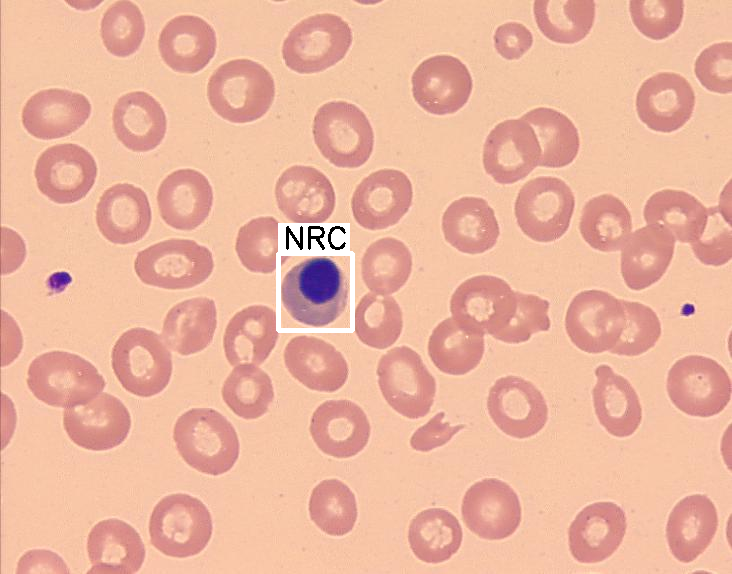

IndexError: ignored

In [ ]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(0))
display(dataset.visualize.ShowBoundingBoxes("BloodImage_00315.jpg"))

# Export to VOC XML
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
VOC creates one XML for each Jpeg in the dataset. 

In [ ]:
dataset.export.ExportToVoc(output_path="/content/drive/MyDrive/aibuilder/embrio1/Voc")[0]

'/content/drive/MyDrive/aibuilder/embrio1/Voc/11_00061_jpg.rf.fbb35e6124268b06516e2722096058d3.xml'